In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from scipy import ndimage, spatial
import cv2 #try <pip install opencv-python-headless> if you havethis error == libSM.so.6: cannot open shared object file: No such file or directory 
import imageio
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import collections
from collections import OrderedDict
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction
from scipy import stats
from statistics import mean 
#for corner detection import
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform

In [5]:
# load images from example_images
sem_data= cv2.imread('example_images/sem_1.jpg',0)
# 0 refers to gray scale, 1 refers to colorful, -1 refers to unchanged 

In [6]:
sem_data.shape

(2188, 3072)

In [7]:
height = sem_data.shape[0]
width = sem_data.shape[1]

In [8]:
# Convert to float: Important for subtraction later which won't work with uint8
image = sem_data
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

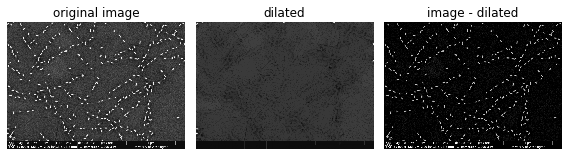

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

In [11]:
def boundary_detection(img, thres = 20):
    '''
    thres: threshold to distinguish the scale bar background with particle background by grey scale
    for now only work for SEM img, needs update if apply to different imgs
    scan from upper to bottom, also needs update if need scan from left to right
    '''
    mode_list = []
    for line in range(len(img)):
        mode = stats.mode(img[line])
        mode_list.append(int(mode[0]))
        
        if line >= 1:
            mode_mean = mean(mode_list)
            if mode_mean - int(mode[0]) >= thres:
                boundary = line
                break
        
    return boundary

In [12]:
boundary_detection(dilated)

2048

In [13]:
# def corner_detection(sem_data):
#     """
#     This function is used to find the length pixel of the scale bar.
#     The imput should be just bottom part of the initial SEM image.
#     This function uses the return result of boundary_detection.
#     """
#     #find the bottom part of the SEM image. Here we used the return refunction 
#     ime = sem_data[boundary_detection(dilated): , int(width/2): ]
    
#     tform = AffineTransform()
#     image = warp(ime,tform.inverse)
#     coords = corner_peaks(corner_harris(image))
#     coords_subpix = corner_subpix(image, coords)
#     #get the length of the scale bar
#     length_scale_bar = abs(coords[0][1] - coords[1][1])
#     #plot
#     fig, ax = plt.subplots(figsize=(15,15))
#     ax.imshow(image, cmap=plt.cm.gray)
#     ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
#             linestyle='None', markersize=6)
#     ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=10)
#     plt.show()
#     return length_scale_bar

In [ ]:
def corner_detection(sem_data):
    """
    This function is used to find the length pixel of the scale bar.
    The imput should be just bottom part of the initial SEM image.
    This function uses the return result of boundary_detection.
    """
    #find the bottom part of the SEM image. Here we used the return refunction 
    ime = sem_data[boundary_detection(dilated): , int(width/2): ]
    
    tform = AffineTransform()
    image = warp(ime,tform.inverse)
    coords = corner_peaks(corner_harris(image))
    coords_subpix = corner_subpix(image, coords)
    
    scales = []
    threshold = 500
    for i in range(len(coords)):
        for j in range(len(coords)):
            if j <= i:
                continue
            else:
                if coords[i][0] == coords[j][0]:
                    scale = abs(coords[i][1] - coords[j][1])
                    if scale > threshold:
                        scales.append((coords[i][0],scale))
                    else:
                        continue
                else:
                    continue
    scalebar = []
    for i in range(len(scales)):
        n_count = 0
        for j in range(len(scales)):
            if scales[i][0] == scales[j][0]:
                n_count += 1
            else:
                continue
        if n_count == 1:
            scalebar.append((scales[i][0], scales[i][1]))
        else:
            continue
    #get the length of the scale bar
    #length_scale_bar = abs(coords[0][1] - coords[1][1])
    #plot
    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(image, cmap=plt.cm.gray)
    ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
            linestyle='None', markersize=6)
    ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=10)
    plt.show()
    return scalebar

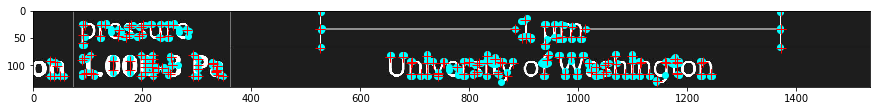

844

In [14]:
length_scale_bar = corner_detection(sem_data)
length_scale_bar

In [38]:
mode = np.zeros(len(dilated))

In [8]:
img=image-dilated
img.shape

(2188, 3072)

In [9]:
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

NameError: name 'blur' is not defined

In [10]:
plt.imsave('example_images/sem_1_1.png', img)

In [11]:
sem_1_1 = cv2.imread('example_images/sem_1_1.png',0)

In [12]:
blur = cv2.GaussianBlur(sem_1_1,(5,5),0)
plt.imsave('example_images/sem_1_blur.png', blur)
plt.show(blur)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

215

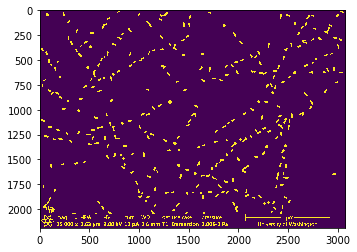

In [13]:
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#show and save images 
plt.imsave('example_images/sem_1_thresh.png', th3)
plt.imshow(th3)

In [14]:
#finding contours for each particles
contours, hierarchy = cv2.findContours(th3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))


478


Total # of Au Particles :
 478


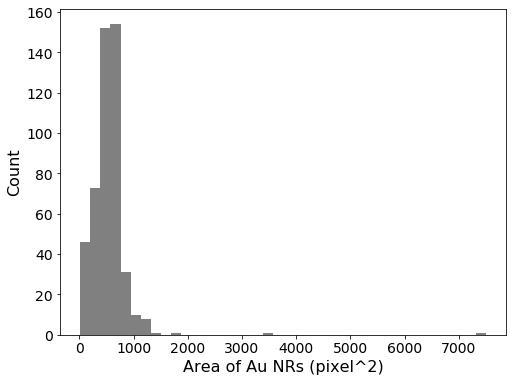

In [15]:
#finding the area of each particles
areas = [cv2.contourArea(contour) for contour in contours]

#ploting areas of Au NRs
plt.figure(figsize=(8, 6))
_ = plt.hist(areas, bins=40, color='gray')
plt.xlabel('Area of Au NRs (pixel^2)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print("Total # of Au Particles :\n", len(areas))

In [16]:
max(areas)

7497.5

Total # of Au Particles :
 478


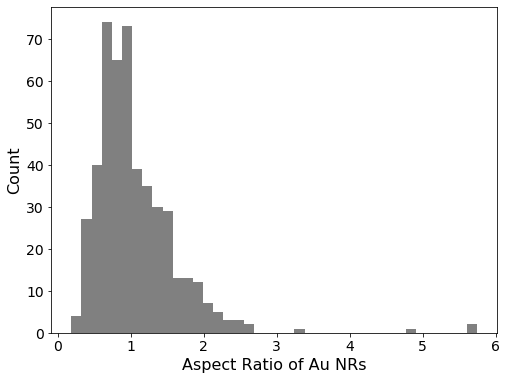

In [17]:
#calculating aspect ratio 
aspectratio = []
for i in range(0,len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    aspect_ratio = float(w)/h
    aspectratio.append(aspect_ratio)

#plotting the aspect ratio of Au NRs
plt.figure(figsize=(8, 6))
_ = plt.hist(aspectratio, bins=40, color='gray')
plt.xlabel('Aspect Ratio of Au NRs', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print("Total # of Au Particles :\n", len(aspectratio))

In [18]:
#calculating angle of Au NRs
angles = []
for i in range(0,len(contours)):
    (x,y),(MA,ma),angle = cv2.fitEllipse(contours[i])
    angles.append(angle)
angles_all = np.asarray(angles)   

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:353: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'cv::fitEllipse'


In [19]:
#calculating angle of Au NRs (from Maxim page)
dictionary = OrderedDict()
com_arr = np.empty((0, 2))
angles = []
for cnt in contours:
    try:
        (com), _, angle = cv2.fitEllipse(cnt)
    except:
        continue
    com = np.array(com)
    com_arr = np.append(com_arr, [com], axis=0)
    angles.append(angle)

Total # of Au Particles :
 475


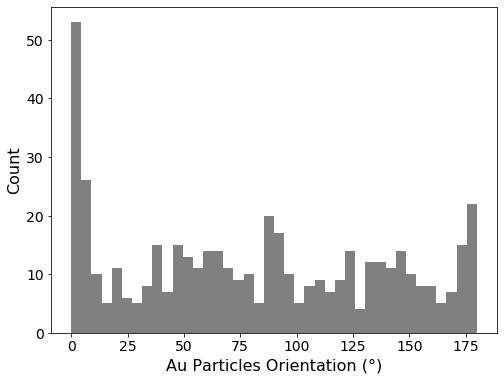

In [20]:
plt.figure(figsize=(8, 6))
_ = plt.hist(angles, bins=40, color='gray')
plt.xlabel('Au Particles Orientation (°)', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
print("Total # of Au Particles :\n", len(angles))